In [496]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib widget

C = 5.0e-10 + 0.0j # f
L = 5.0e-10 + 0.0j # H

R_l = 50   + 0.0j # Ω
R   = 0.02 + 0.0j # Ω

Lam1 = -0.5*( R_l/L + 1/(R*C) + np.sqrt( (R_l/L - 1/(R*C))**2 - 4/(L*C) ) )
Lam2 = -0.5*( R_l/L + 1/(R*C) - np.sqrt( (R_l/L - 1/(R*C))**2 - 4/(L*C) ) )

U0 = 1    

def calHomSol(Id0, I0, t):

    ans  = Id0 * (     np.exp(Lam1*t) -      np.exp(Lam2*t))/(Lam1-Lam2)
    ans += I0  * (Lam2*np.exp(Lam1*t) - Lam1*np.exp(Lam2*t))/(Lam1-Lam2)

    return ans

def calHomSolDot(Id0, I0, t):

    ans  = Id0 *           (Lam1*np.exp(Lam1*t) - Lam2*np.exp(Lam2*t))/(Lam1-Lam2)
    ans += I0  * Lam2*Lam1*(     np.exp(Lam1*t) -      np.exp(Lam2*t))/(Lam1-Lam2)

    return ans


def calcSqSig(t:np.ndarray, t0):

    ans = np.empty_like(t, dtype=np.complex256)

    ans[t <= t0] = calHomSol(0, U0/(R + R_l), t[t <= t0]) + U0/(R + R_l)

    It0  = calHomSol(   0, U0/(R + R_l), t0) + U0/(R + R_l)
    Idt0 = calHomSolDot(0, U0/(R + R_l), t0)

    ans[t > t0] = calHomSol(Idt0, -It0, t[t > t0]-t0)

    return np.real(ans)



def trueSig(t:np.ndarray, t0):

    ans = np.empty_like(t, dtype=np.complex256)
    ans[t <= t0] = U0/R_l
    ans[t > t0]  = 0

    return np.real(ans)

In [497]:
num_points = 197
# num_points = 1024

t = np.linspace(0.0, 9.1e-10, num_points, dtype=np.float128)

sample_rate = 9.1e-10/num_points

In [498]:
def fft(x:np.ndarray):

    N = x.size

    A = np.fromfunction(lambda i,k: np.exp(-2j*np.pi*i*k/N), (N,N))
    A = A/np.sqrt(N)

    return np.matmul(A, x)

def ifft(x:np.ndarray):

    N = x.size

    A = np.fromfunction(lambda i,k: np.exp(2j*np.pi*i*k/N), (N,N))
    A = A/np.sqrt(N)

    return np.matmul(A, x)


## Calculate first square signal

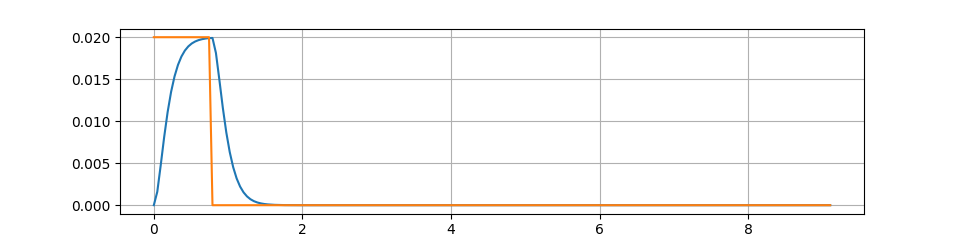

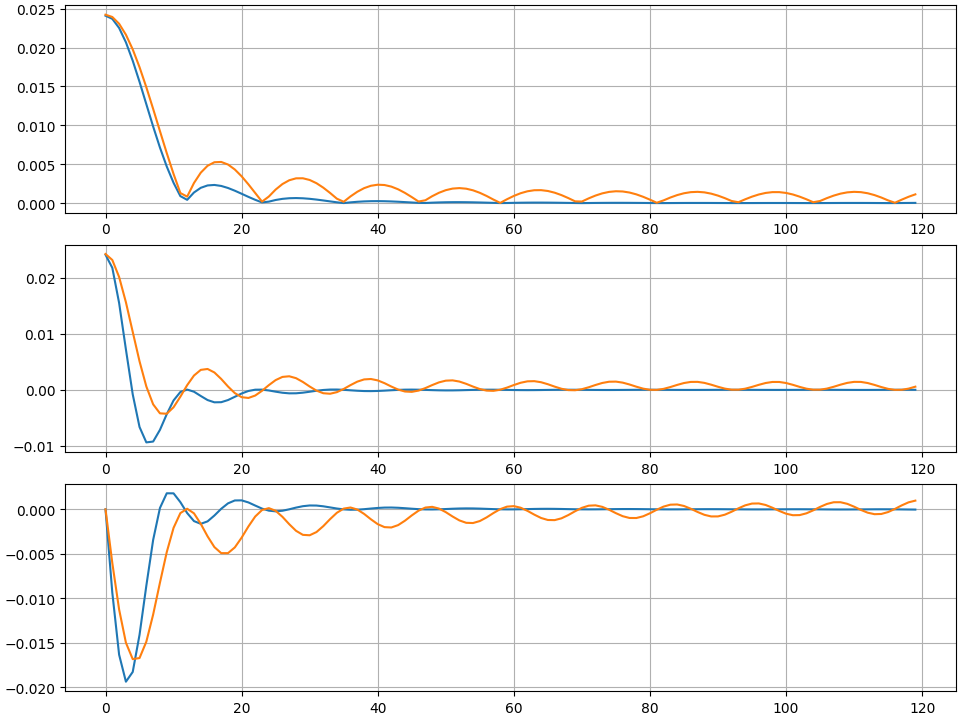

In [499]:
puls_width_1 = 17
# puls_width_1 = 170

t0_1 = puls_width_1*sample_rate

## #### #### #### ####
##  direct signals  ##
## #### #### #### ####

I_1 = calcSqSig(t, t0_1)

plt.figure(figsize=(6.4*3/2, 4.8/2))
plt.plot(t, np.real(I_1))

# I0 = U0/(R + R_l)
# plt.plot([0,0, t0, t0, t[-1], t[-1]], [0, I0, I0, 0, 0, 0])
I_1_true = trueSig(t, t0_1)
plt.plot(t, I_1_true)

plt.grid()

### #### #### #### ####
##  fourrier images  ##
### #### #### #### ####

num_of_comps = 120

tr_I_1      = fft(I_1     )
tr_I_1_true = fft(I_1_true)

plt.figure(figsize=(6.4*3/2, 4.8*3/2), constrained_layout=True)

plt.subplot(3,1,1)
plt.plot(np.abs(tr_I_1     )[:num_of_comps])
plt.plot(np.abs(tr_I_1_true)[:num_of_comps])
plt.grid()

plt.subplot(3,1,2)
plt.plot(np.real(tr_I_1     )[:num_of_comps])
plt.plot(np.real(tr_I_1_true)[:num_of_comps])
plt.grid()

plt.subplot(3,1,3)
plt.plot(np.imag(tr_I_1     )[:num_of_comps])
plt.plot(np.imag(tr_I_1_true)[:num_of_comps])
plt.grid()


## Calculate second square signal

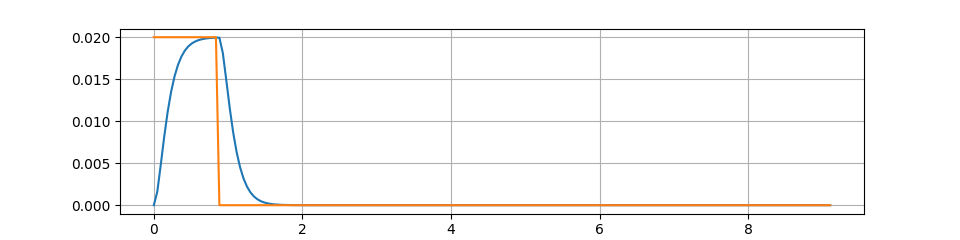

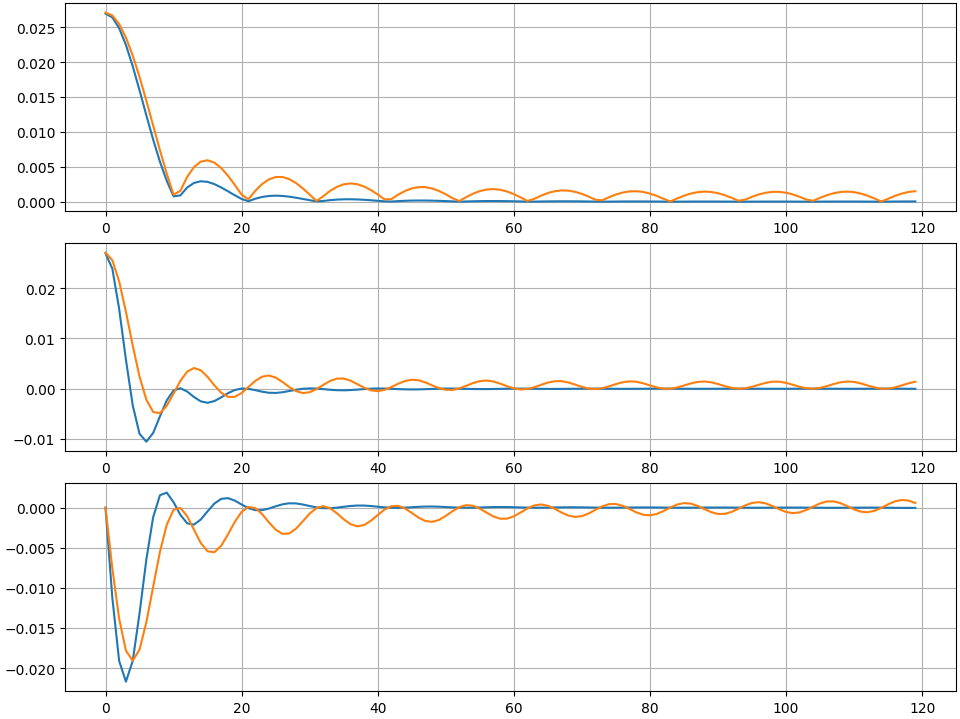

In [500]:
puls_width_2 = 19
# puls_width_2 = 190

t0_2 = puls_width_2*sample_rate

## #### #### #### ####
##  direct signals  ##
## #### #### #### ####

I_2 = calcSqSig(t, t0_2)

plt.figure(figsize=(6.4*3/2, 4.8/2))
plt.plot(t, np.real(I_2))

# I0 = U0/(R + R_l)
# plt.plot([0,0, t0, t0, t[-1], t[-1]], [0, I0, I0, 0, 0, 0])
I_2_true = trueSig(t, t0_2)
plt.plot(t, I_2_true)

plt.grid()

### #### #### #### ####
##  fourrier images  ##
### #### #### #### ####

num_of_comps = 120

tr_I_2      = fft(I_2     )
tr_I_2_true = fft(I_2_true)

plt.figure(figsize=(6.4*3/2, 4.8*3/2), constrained_layout=True)

plt.subplot(3,1,1)
plt.plot(np.abs(tr_I_2     )[:num_of_comps])
plt.plot(np.abs(tr_I_2_true)[:num_of_comps])
plt.grid()

plt.subplot(3,1,2)
plt.plot(np.real(tr_I_2     )[:num_of_comps])
plt.plot(np.real(tr_I_2_true)[:num_of_comps])
plt.grid()

plt.subplot(3,1,3)
plt.plot(np.imag(tr_I_2     )[:num_of_comps])
plt.plot(np.imag(tr_I_2_true)[:num_of_comps])
plt.grid()


## Calculate third square signal

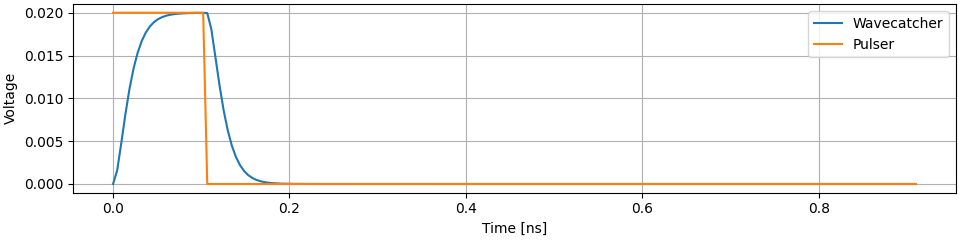

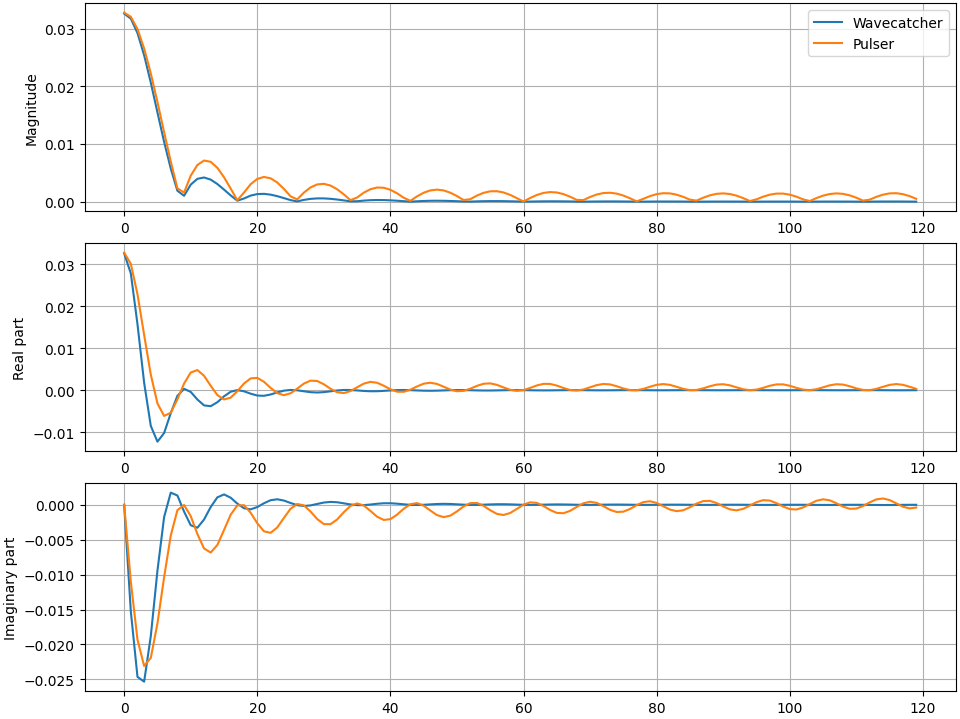

In [501]:
puls_width_3 = 23
# puls_width_3 = 230

t0_3 = puls_width_3*sample_rate

## #### #### #### ####
##  direct signals  ##
## #### #### #### ####

I_3 = calcSqSig(t, t0_3)

plt.figure(figsize=(6.4*3/2, 4.8/2), constrained_layout=True)
plt.plot(t*1e9, np.real(I_3), label="Wavecatcher")

# I0 = U0/(R + R_l)
# plt.plot([0,0, t0, t0, t[-1], t[-1]], [0, I0, I0, 0, 0, 0])
I_3_true = trueSig(t, t0_3)
plt.plot(t*1e9, I_3_true, label="Pulser")

plt.grid()
plt.xlabel("Time [ns]")
plt.ylabel("Voltage")
plt.legend()

### #### #### #### ####
##  fourrier images  ##
### #### #### #### ####

num_of_comps = 120

tr_I_3      = fft(I_3     )
tr_I_3_true = fft(I_3_true)

plt.figure(figsize=(6.4*3/2, 4.8*3/2), constrained_layout=True)

plt.subplot(3,1,1)
plt.plot(np.abs(tr_I_3     )[:num_of_comps], label="Wavecatcher")
plt.plot(np.abs(tr_I_3_true)[:num_of_comps], label="Pulser"     )
plt.legend()
plt.ylabel("Magnitude")
plt.grid()

plt.subplot(3,1,2)
plt.plot(np.real(tr_I_3     )[:num_of_comps])
plt.plot(np.real(tr_I_3_true)[:num_of_comps])
plt.ylabel("Real part")
plt.grid()

plt.subplot(3,1,3)
plt.plot(np.imag(tr_I_3     )[:num_of_comps])
plt.plot(np.imag(tr_I_3_true)[:num_of_comps])
plt.ylabel("Imaginary part")
plt.grid()


## Comparing fourrier imsges

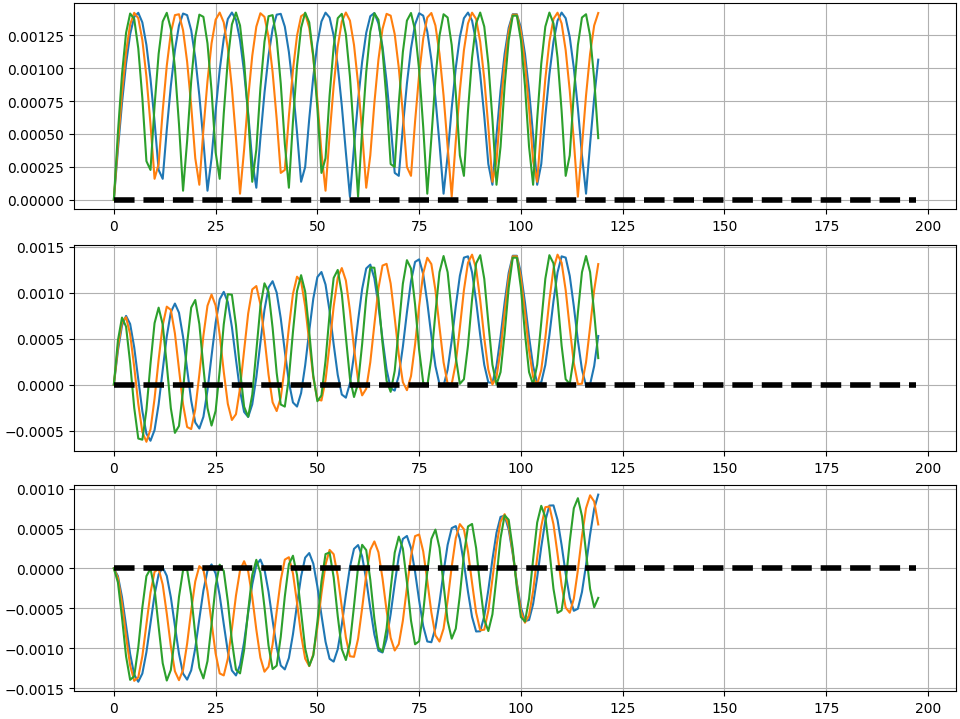

In [502]:
modulation = np.arange(tr_I_2_true.size)
modulation = np.sin(np.pi * modulation / num_points)

plt.figure(figsize=(6.4*3/2, 4.8*3/2), constrained_layout=True)

plt.subplot(3,1,1)
plt.plot((np.abs(tr_I_1_true)*modulation)[:num_of_comps])
plt.plot((np.abs(tr_I_2_true)*modulation)[:num_of_comps])
plt.plot((np.abs(tr_I_3_true)*modulation)[:num_of_comps])
plt.hlines(0, 0, tr_I_2_true.size, colors="black", linestyles = "--", linewidth=4)
plt.grid()

plt.subplot(3,1,2)
plt.plot((np.real(tr_I_1_true)*modulation)[:num_of_comps])
plt.plot((np.real(tr_I_2_true)*modulation)[:num_of_comps])
plt.plot((np.real(tr_I_3_true)*modulation)[:num_of_comps])
plt.hlines(0, 0, tr_I_2_true.size, colors="black", linestyles = "--", linewidth=4)
plt.grid()

plt.subplot(3,1,3)
plt.plot((np.imag(tr_I_1_true)*modulation)[:num_of_comps])
plt.plot((np.imag(tr_I_2_true)*modulation)[:num_of_comps])
plt.plot((np.imag(tr_I_3_true)*modulation)[:num_of_comps])
plt.hlines(0, 0, tr_I_2_true.size, colors="black", linestyles = "--", linewidth=4)
plt.grid()

## Expoential signal

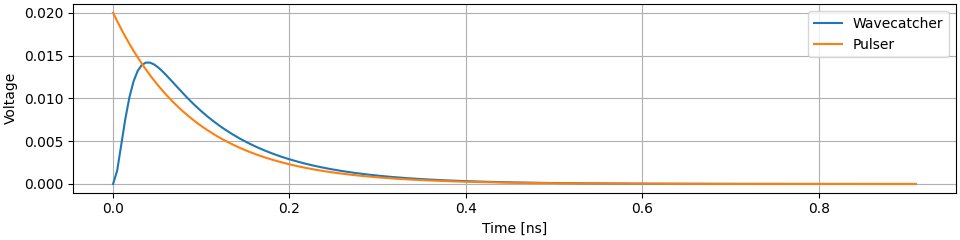

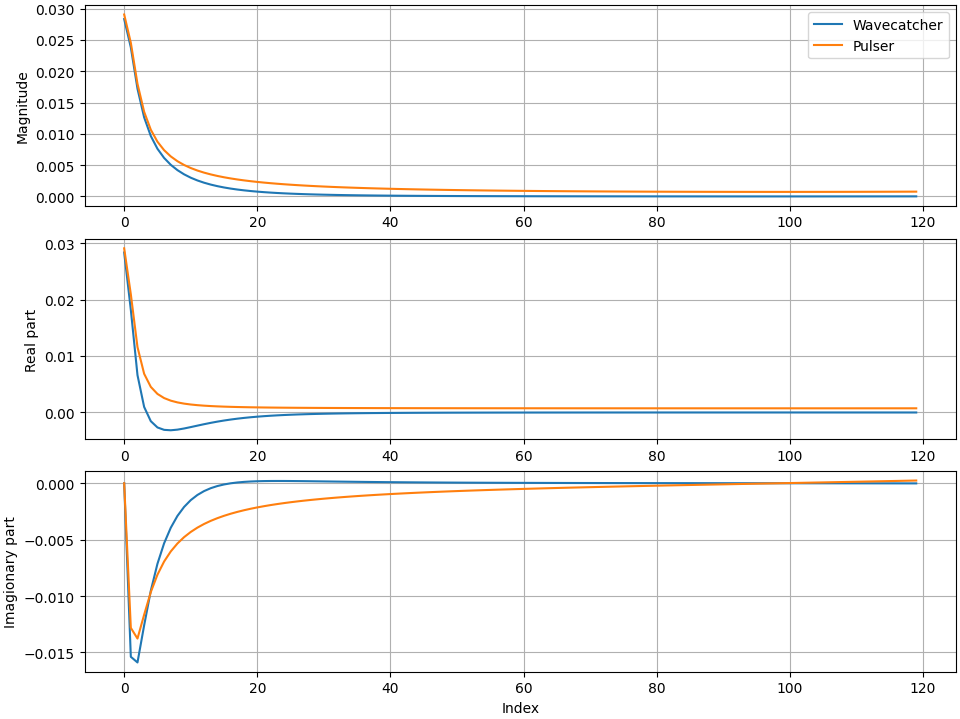

In [503]:
Lam = 1/(20*sample_rate)
# Lam = 1/(200*sample_rate)


D = np.real(U0/(Lam**2*R*C*L - R*C*L*(R_l/L + 1/(R*C))*Lam + R+R_l ))

I_exp = np.real(calHomSol(Lam*D, D, t)) + D*np.exp(-Lam*t)

## #### #### #### ####
##  direct signals  ##
## #### #### #### ####

plt.figure(figsize=(6.4*3/2, 4.8/2), constrained_layout=True)
plt.plot(t*1e9, I_exp, label="Wavecatcher")

I_0 = np.real(U0/R_l)
I_exp_true = I_0*np.exp(-Lam*t)
plt.plot(t*1e9, I_exp_true, label="Pulser")

plt.grid()
plt.xlabel("Time [ns]")
plt.ylabel("Voltage")
plt.legend()

### #### #### #### ####
##  fourrier images  ##
### #### #### #### ####

num_of_comps = 120

tr_I_exp      = fft(I_exp     )
tr_I_exp_true = fft(I_exp_true)

plt.figure(figsize=(6.4*3/2, 4.8*3/2), constrained_layout=True)

plt.subplot(3,1,1)
plt.plot(np.abs(tr_I_exp     )[:num_of_comps], label="Wavecatcher")
plt.plot(np.abs(tr_I_exp_true)[:num_of_comps], label="Pulser"     )
plt.legend()
plt.ylabel("Magnitude")
plt.grid()

plt.subplot(3,1,2)
plt.plot(np.real(tr_I_exp     )[:num_of_comps])
plt.plot(np.real(tr_I_exp_true)[:num_of_comps])
plt.ylabel("Real part")
plt.grid()

plt.subplot(3,1,3)
plt.plot(np.imag(tr_I_exp     )[:num_of_comps])
plt.plot(np.imag(tr_I_exp_true)[:num_of_comps])
plt.ylabel("Imagionary part")
plt.xlabel("Index")
plt.grid()

/tmp/ipykernel_125881/2974791771.py:33: RuntimeWarning: divide by zero encountered in divide
  uncert_1_imag = np.abs(np.sqrt(1+tran_fun_s_1.imag**2)/tr_I_1_true.imag)
/tmp/ipykernel_125881/2974791771.py:34: RuntimeWarning: divide by zero encountered in divide
  uncert_2_imag = np.abs(np.sqrt(1+tran_fun_s_2.imag**2)/tr_I_2_true.imag)
/tmp/ipykernel_125881/2974791771.py:35: RuntimeWarning: divide by zero encountered in divide
  uncert_3_imag = np.abs(np.sqrt(1+tran_fun_s_3.imag**2)/tr_I_3_true.imag)


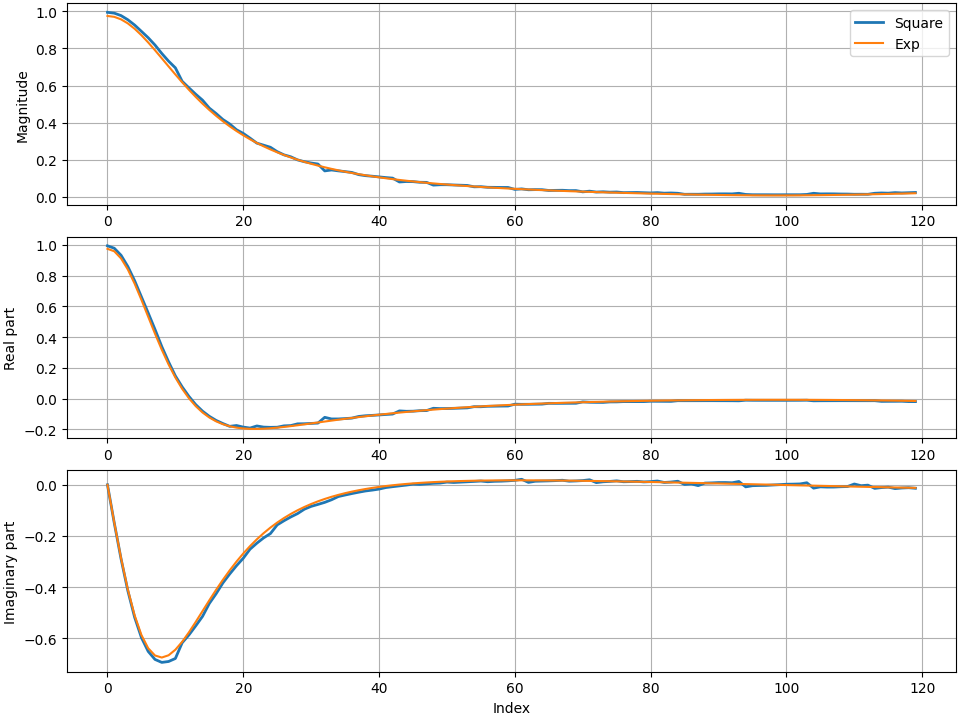

In [504]:
## #### #### #### #### ##
## Transition function ##
## #### #### #### #### ##

plt.figure(figsize=(6.4*3/2, 4.8*3/2), constrained_layout=True)

tran_fun_s_1   = tr_I_1/tr_I_1_true
tran_fun_s_2   = tr_I_2/tr_I_2_true
tran_fun_s_3   = tr_I_3/tr_I_3_true

### #### #### #### #### #### #### ####
## Real part of transition function ##
### #### #### #### #### #### #### ####

uncert_1_real = np.abs(np.sqrt(1+tran_fun_s_1.real**2)/tr_I_1_true.real)
uncert_2_real = np.abs(np.sqrt(1+tran_fun_s_2.real**2)/tr_I_2_true.real)
uncert_3_real = np.abs(np.sqrt(1+tran_fun_s_3.real**2)/tr_I_3_true.real)

# uncert_1_real = 1/np.abs(tr_I_1_true.real)
# uncert_2_real = 1/np.abs(tr_I_2_true.real)

tran_fun_s_real = np.empty_like(tran_fun_s_1, dtype=np.float128)

tran_fun_s_real[(uncert_1_real <= uncert_2_real)*(uncert_1_real <= uncert_3_real)] = tran_fun_s_1[(uncert_1_real <= uncert_2_real)*(uncert_1_real <= uncert_3_real)].real
tran_fun_s_real[(uncert_2_real <  uncert_1_real)*(uncert_2_real <  uncert_3_real)] = tran_fun_s_2[(uncert_2_real <  uncert_1_real)*(uncert_2_real <  uncert_3_real)].real
tran_fun_s_real[(uncert_3_real <  uncert_1_real)*(uncert_3_real <  uncert_2_real)] = tran_fun_s_3[(uncert_3_real <  uncert_1_real)*(uncert_3_real <  uncert_2_real)].real


#### #### #### #### #### #### #### #### ####
## Imagionary part of transition function ##
#### #### #### #### #### #### #### #### ####

uncert_1_imag = np.abs(np.sqrt(1+tran_fun_s_1.imag**2)/tr_I_1_true.imag)
uncert_2_imag = np.abs(np.sqrt(1+tran_fun_s_2.imag**2)/tr_I_2_true.imag)
uncert_3_imag = np.abs(np.sqrt(1+tran_fun_s_3.imag**2)/tr_I_3_true.imag)

# uncert_1_imag = 1/np.abs(tr_I_1_true.imag)
# uncert_2_imag = 1/np.abs(tr_I_2_true.imag)

tran_fun_s_imag = np.empty_like(tran_fun_s_1, dtype=np.float128)

tran_fun_s_imag[(uncert_1_imag <= uncert_2_imag)*(uncert_1_imag <= uncert_3_imag)] = tran_fun_s_1[(uncert_1_imag <= uncert_2_imag)*(uncert_1_imag <= uncert_3_imag)].imag
tran_fun_s_imag[(uncert_2_imag <  uncert_1_imag)*(uncert_2_imag <  uncert_3_imag)] = tran_fun_s_2[(uncert_2_imag <  uncert_1_imag)*(uncert_2_imag <  uncert_3_imag)].imag
tran_fun_s_imag[(uncert_3_imag <  uncert_1_imag)*(uncert_3_imag <  uncert_2_imag)] = tran_fun_s_3[(uncert_3_imag <  uncert_1_imag)*(uncert_3_imag <  uncert_2_imag)].imag


#### #### #### #### #### #### ####
## Comples transition function ##
#### #### #### #### #### #### ####

tran_fun_s = tran_fun_s_real + 1j*tran_fun_s_imag

tran_fun_exp = tr_I_exp/tr_I_exp_true

plt.subplot(3,1,1)
# plt.plot(np.abs(tran_fun_s_1)[:num_of_comps], label="Square 1" )
# plt.plot(np.abs(tran_fun_s_2)[:num_of_comps], label="Square 2" )
plt.plot(np.abs(tran_fun_s  )[:num_of_comps], label = "Square", linewidth = 2)
plt.plot(np.abs(tran_fun_exp)[:num_of_comps], label = "Exp" )
# plt.ylim(0, 1)
plt.legend()
plt.ylabel("Magnitude")
plt.grid()

plt.subplot(3,1,2)
# plt.plot(np.real(tran_fun_s_1)[:num_of_comps] )
# plt.plot(np.real(tran_fun_s_2)[:num_of_comps] )
plt.plot(np.real(tran_fun_s  )[:num_of_comps], linewidth = 2 )
plt.plot(np.real(tran_fun_exp)[:num_of_comps] )
# plt.ylim(-1, 1)
plt.ylabel("Real part")
plt.grid()

plt.subplot(3,1,3)
# plt.plot(np.imag(tran_fun_s_1)[:num_of_comps] )
# plt.plot(np.imag(tran_fun_s_2)[:num_of_comps] )
plt.plot(np.imag(tran_fun_s  )[:num_of_comps], linewidth = 2 )
plt.plot(np.imag(tran_fun_exp)[:num_of_comps] )
# plt.ylim(-1, 1)
plt.ylabel("Imaginary part")
plt.xlabel("Index")
plt.grid()

## Restoring function from its corrected image

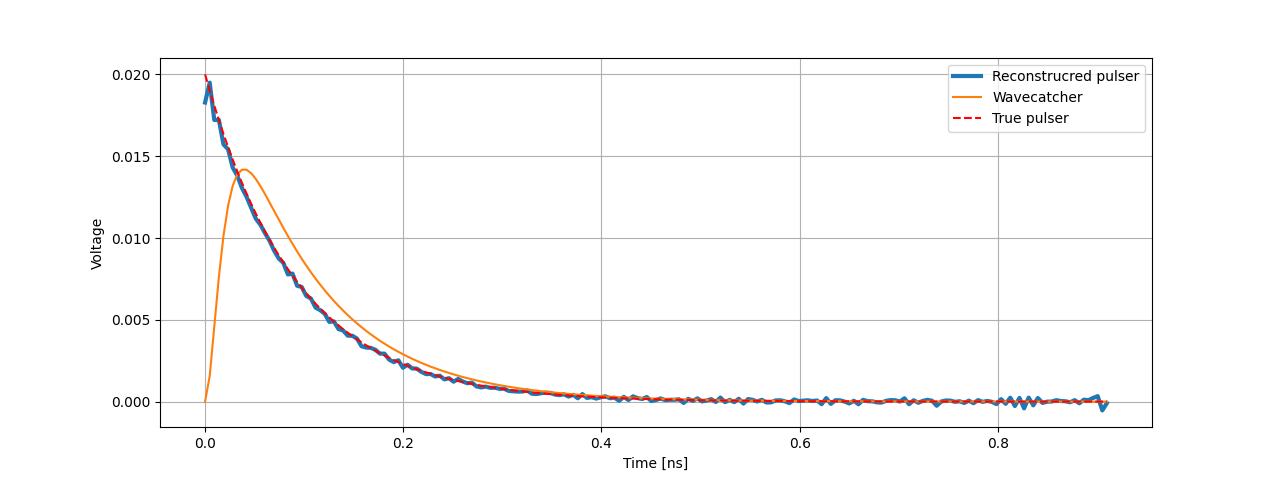

In [505]:
tr_I_exp_restor = tr_I_exp/tran_fun_s

I_exp_restor = ifft(tr_I_exp_restor)
I_exp_restor = np.real(I_exp_restor)

plt.figure(figsize=(6.4*2, 4.8))
plt.plot(t*1e9, I_exp_restor, linewidth=3, label="Reconstrucred pulser")
plt.plot(t*1e9, I_exp,                     label="Wavecatcher"         )
plt.plot(t*1e9, I_exp_true,    "--r",      label="True pulser"         )
plt.xlabel("Time [ns]")
plt.ylabel("Voltage")
plt.legend()
plt.grid()

In [506]:
N = tran_fun_s.size

A = np.fromfunction(lambda i,k: np.exp(-2j*np.pi*i*k/N), (N,N))
A = A/np.sqrt(N)


Ainv = np.fromfunction(lambda i,k: np.exp(2j*np.pi*i*k/N), (N,N))
Ainv = Ainv/np.sqrt(N)


Ainvh_s = (1/tran_fun_s)*Ainv

D_s = np.matmul(Ainvh_s, A)

[[-20.74340295  10.35020845   1.13310226  -0.19217845]
 [ 17.03132875 -20.74340295  10.35020845   1.13310226]
 [-10.12889695  17.03132875 -20.74340295  10.35020845]
 [  5.86945282 -10.12889695  17.03132875 -20.74340295]]


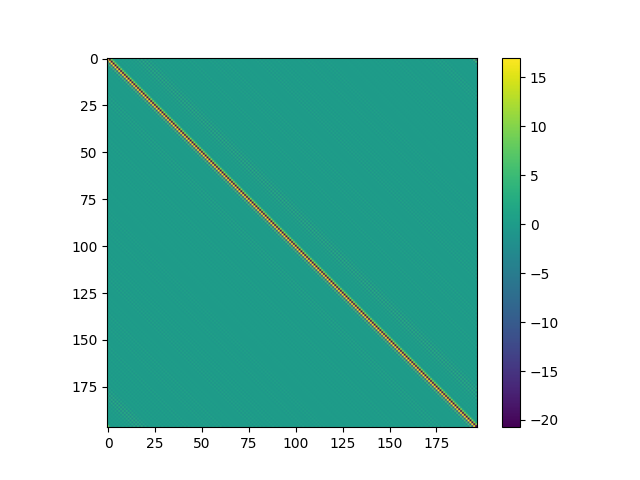

In [507]:
print(D_s[:4,:4].real)

plt.figure()
plt.imshow(np.real(D_s))
plt.colorbar()

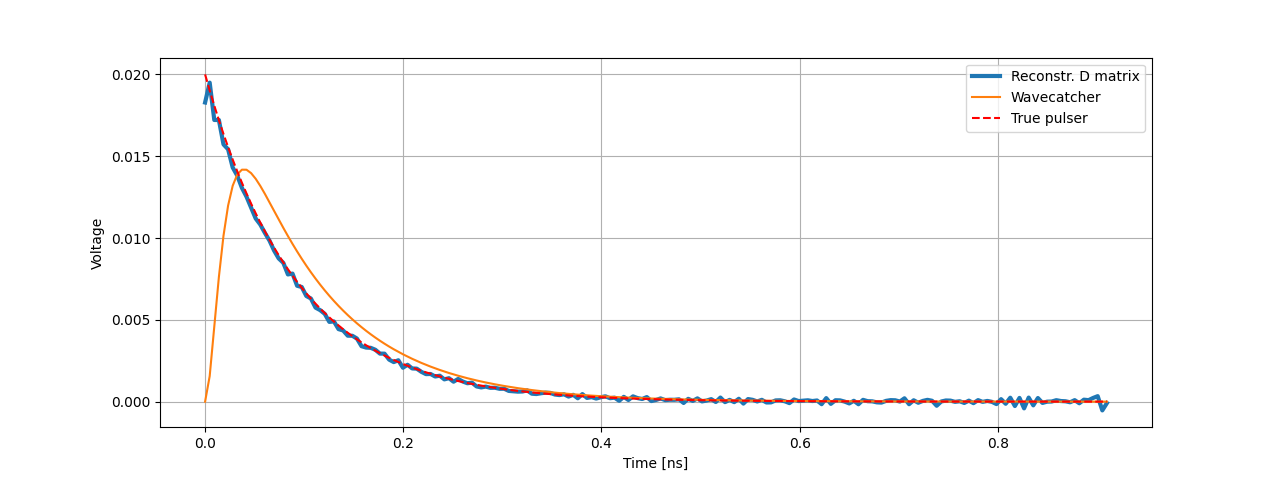

In [508]:
I_exp_restorD = np.matmul(D_s, I_exp)
I_exp_restorD = np.real(I_exp_restorD)

plt.figure(figsize=(6.4*2, 4.8))
plt.plot(t*1e9, I_exp_restorD, linewidth=3, label="Reconstr. D matrix"  )
plt.plot(t*1e9, I_exp,                      label="Wavecatcher"         )
plt.plot(t*1e9, I_exp_true,    "--r",       label="True pulser"         )
plt.xlabel("Time [ns]")
plt.ylabel("Voltage")
plt.legend()
plt.grid()

## Testing on square pulses to see how it performs due to cyclic properties of fourrier transformation

/home/denys/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/denys/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


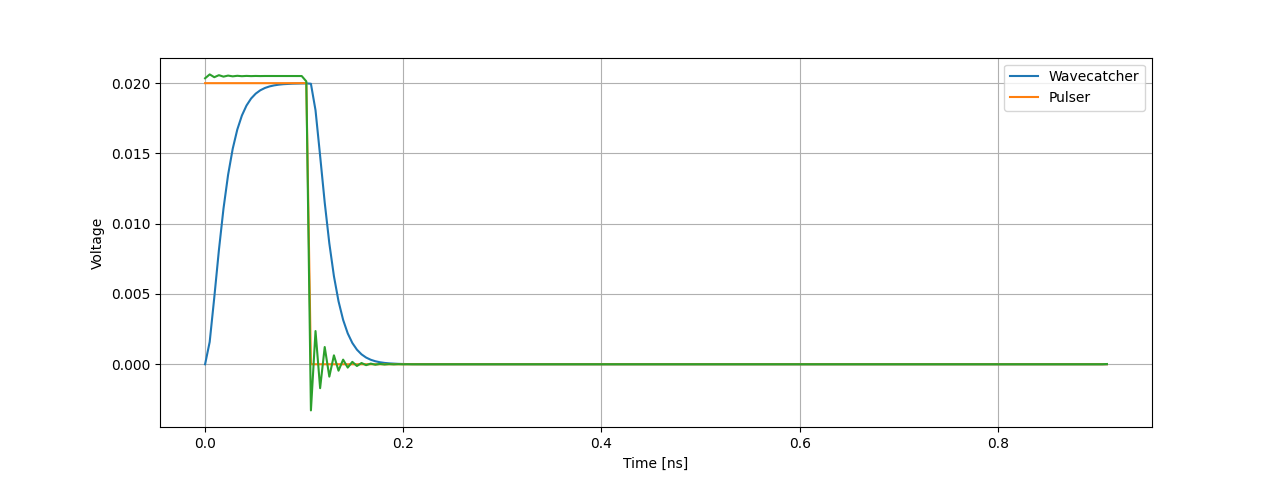

In [509]:
Ainvh_exp = (1/tran_fun_exp)*Ainv

D_exp = np.matmul(Ainvh_exp, A)

I_3_restor = np.matmul(D_exp, np.real(I_3))

plt.figure(figsize=(6.4*2, 4.8))
plt.plot(t*1e9, np.real(I_3), label="Wavecatcher")
plt.plot(t*1e9, np.real(I_3_true), label="Pulser")
plt.plot(t*1e9, I_3_restor)


plt.grid()
plt.xlabel("Time [ns]")
plt.ylabel("Voltage")
plt.legend()

The non perfect restortion of signal is probably due to the fact that number of points in low. If one made larger numner of points N, the precision improves. This conclusion based on the test with larger number of points.

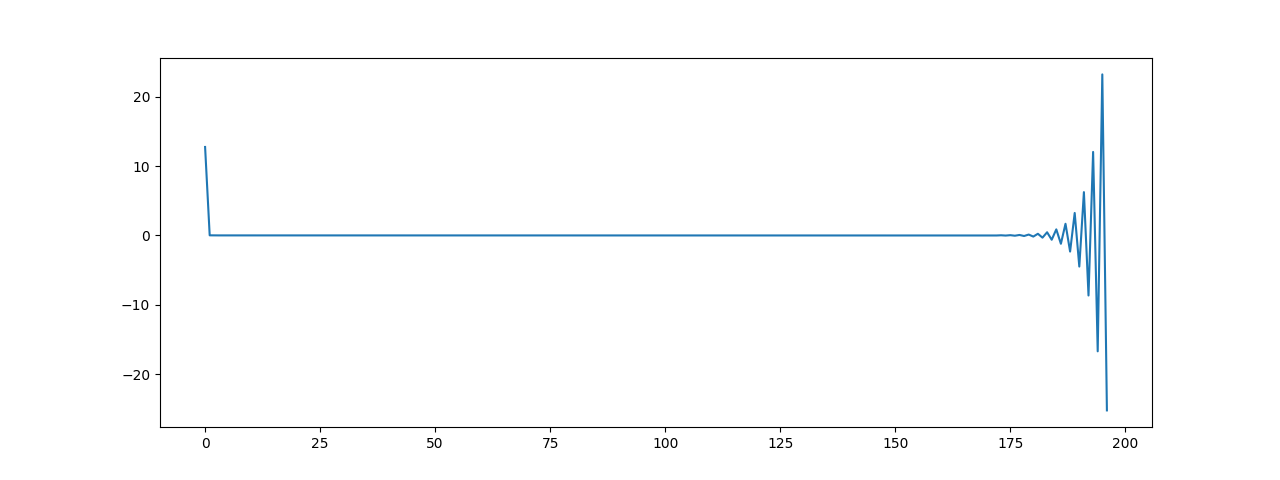

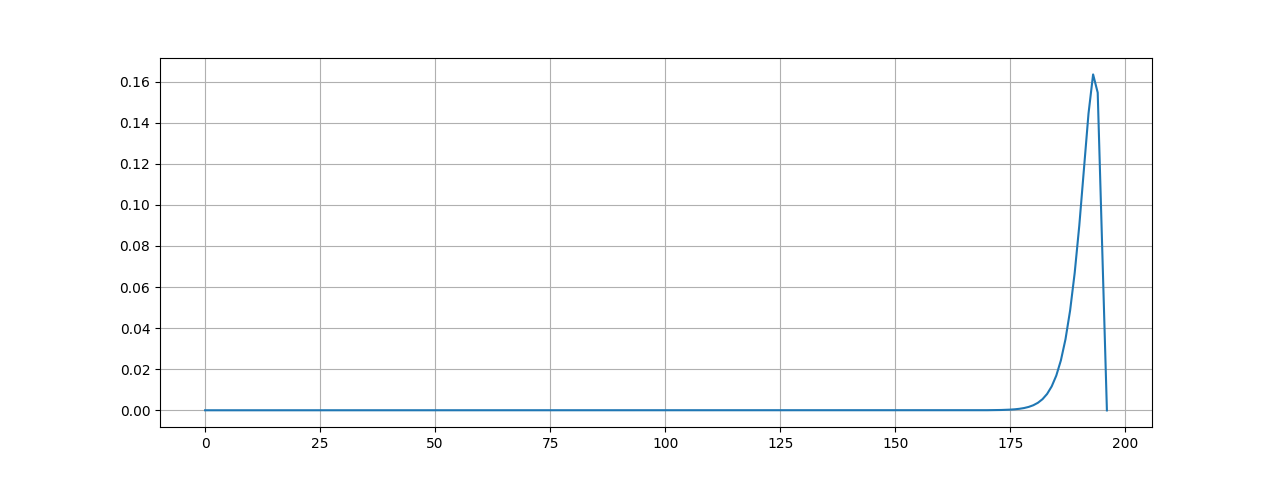

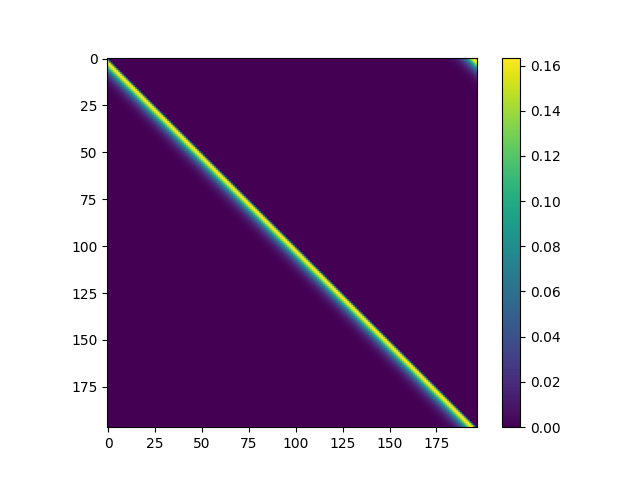

In [510]:
## #### #### #### #### #### #### #### #### #### #### #### #### ##
## Transition function from siscrete fourrier transformation   ##
## #### #### #### #### #### #### #### #### #### #### #### #### ##

plt.figure(figsize=(6.4*2, 4.8))
plt.plot(np.real(D_exp[-1,:]))

## #### #### #### #### #### ####
## Direct transition function ##
## #### #### #### #### #### ####
plt.figure(figsize=(6.4*2, 4.8))
plt.plot(np.real(np.linalg.inv(D_exp.astype(np.complex128))[-1,:]))
plt.grid()

### #### #### #### #### #### ####
## Determinant of D_s matrix   ##
### #### #### #### #### #### ####
plt.figure(figsize=(6.4, 4.8))
plt.imshow(np.real(np.linalg.inv(D_exp.astype(np.complex128))))
plt.colorbar()

## Let's try direct transition function calculation in time domain.

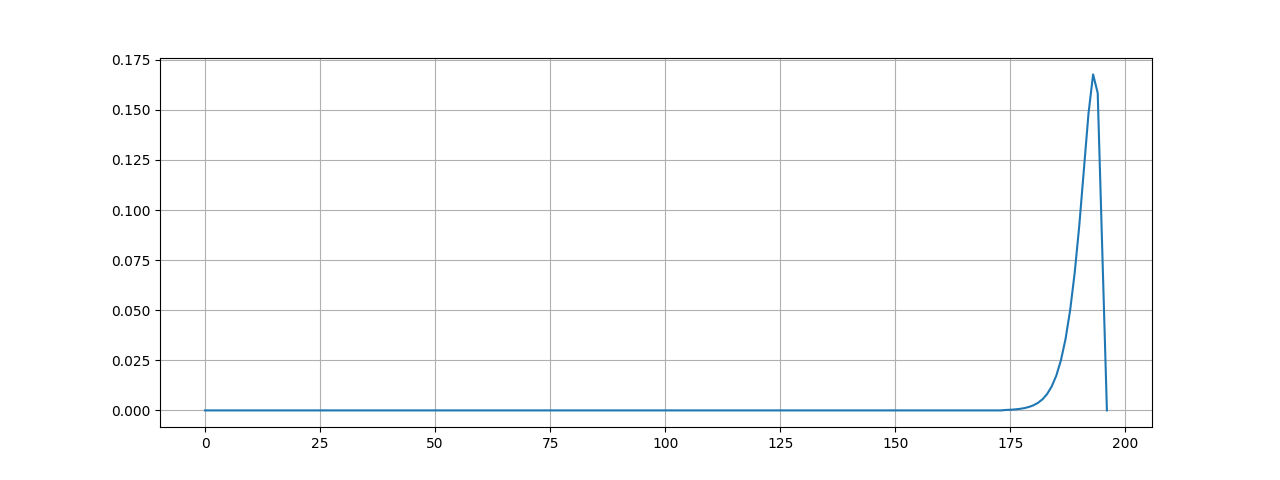

In [511]:
def calcTransFunc(true_signal, measured_signal):
    '''
        measured_signal = tr_fun X true_signal
    '''


    tr_fun = np.empty_like(true_signal, dtype=np.float128)

    for i in range(tr_fun.size):

        tr_fun[i] = measured_signal[i]

        for j in range(0, i):

            tr_fun[i] -= tr_fun[j]*true_signal[i-j-1]
        
        tr_fun[i] = tr_fun[i]/true_signal[i] if np.abs(true_signal[i]) > 5.0e-3 else 0

    return tr_fun[::-1]

plt.figure(figsize=(6.4*2, 4.8))
# plt.plot(calcTransFunc(I_exp_true, I_exp))
# plt.plot(calcTransFunc(I_1_true,   I_1  ), ".")
# plt.plot(calcTransFunc(I_2_true,   I_2  ), "--")
plt.plot(calcTransFunc(I_3_true,   I_3  ))
# plt.ylim(-0.004, 0.175)
plt.grid()

## Trying to calculate transition funciton in other direction

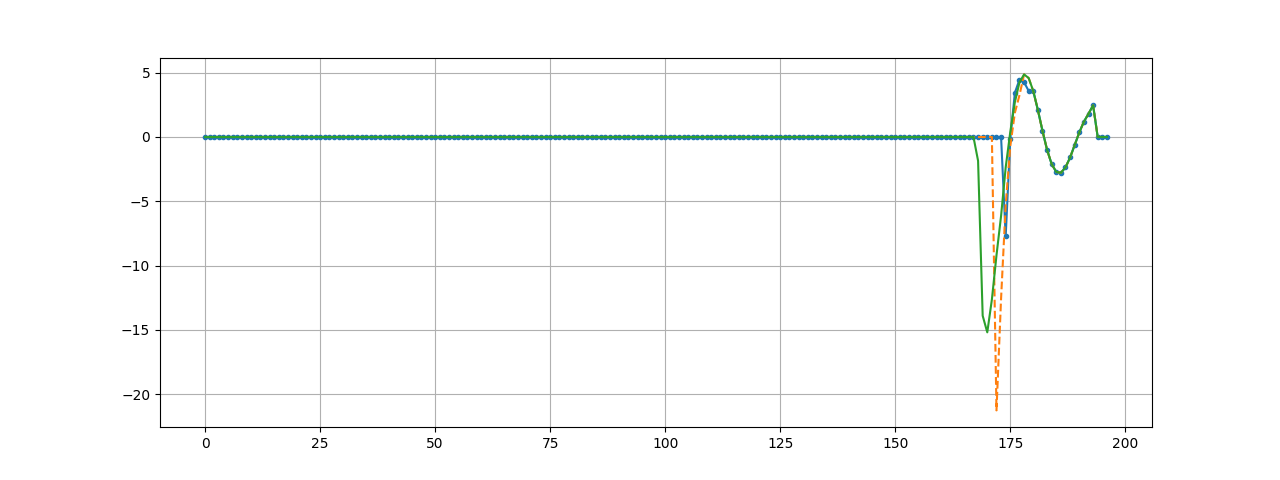

In [512]:
plt.figure(figsize=(6.4*2, 4.8))
# plt.plot(calcTransFunc(I_exp, I_exp_true))
plt.plot(calcTransFunc(I_1, I_1_true), ".-")
plt.plot(calcTransFunc(I_2, I_2_true), "--")
plt.plot(calcTransFunc(I_3, I_3_true)      )
plt.grid()

One can see that it is not feasible to calculate transition function this way. It is clear that transition functions here looks different from each other, but they supposed to be identical. This is occures because the width of square signals are different and for all other points the true square signal is zero which badly behaive in calcualtions.

## Compose D matrix from transition function

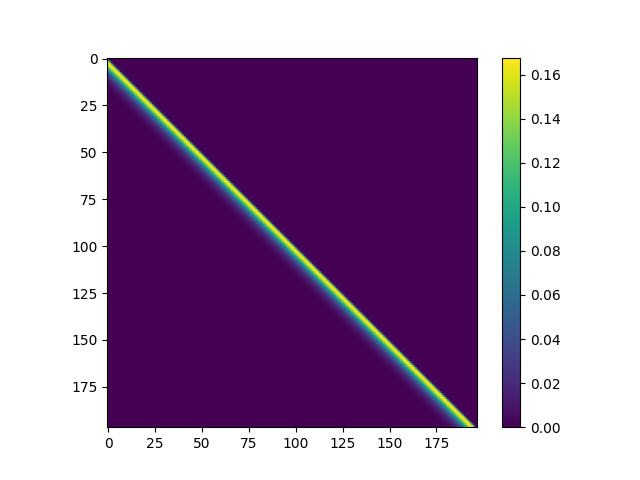

In [513]:
tran_fun_dir = calcTransFunc(I_3_true, I_3)

N = tran_fun_dir.size

D_direct = [ [tran_fun_dir[j-i-1] if j<=i else 0 for j in range(N) ] for i in range(N)]
D_direct = np.array(D_direct)


plt.figure()
plt.imshow(D_direct)
plt.colorbar()

Transformation in other direction function can be calculated as well by taking matrix, inverse to D_direct.

In [514]:
print(np.linalg.det(D_direct.astype(float)))

0.0


As one can see, determinant of D_direct is zero so no inverse martic can be found. This is also reflected by the fact that we got different transtision function in iverse direction before, when we tryied to flop signal from pulser and measured signals.

Before we had similar matrix as one on the last figure. The iverse existed for thouse matrix, but now it is not. The differense that in previous matric also was non zero components in right top corner (thouse reflect the periodisness of fourrier transformation), previously inverse matrix existed because of thouse corner elements.

## Artificial findign transition in other direction function working only in time domain

One may artificially add that corner elements to the matrix (just by making rows of the matrix to by cyclis, rather that truncated) calculate inverse matrix and then artificially remove corner elements.

Instead of finding the iverse matrix, given the way of matrix is constructed, one may solwe the system of equation eistead

$$
\begin{cases}
\sum_{i=1}^N b_i h_{i} = 1 
\\
\sum_{i=1}^N b_i h_{mod(i+\delta, N)} = 0
\end{cases}
$$

Where $h_i$ are the components of knows transition funciton, $b_i$ are the components of unknown transition funciton in other direction. $mod(i+\delta, N)$ means that index cyclicaly shifted by $\delta$ with respect to i. $\delta \neq 0, N, 2N, 3N$  

The condition of $\sum_{i=1}^N b_i h_{mod(i+\delta, N)} = 0$ is find vector $\vec{b}$ ortogonal to all of the vectors $\vec{h}_{\delta}$. Components of such a vector is equal to $b_k = (-1)^k |A_k|$, where $|A_k|$ is the matrix, whouse rows composed of vectors $\vec{h}_{\delta}$ and k-th column is removed. This is verry similar to how one find cross product which is perpendicular to the vectors participaring in product.

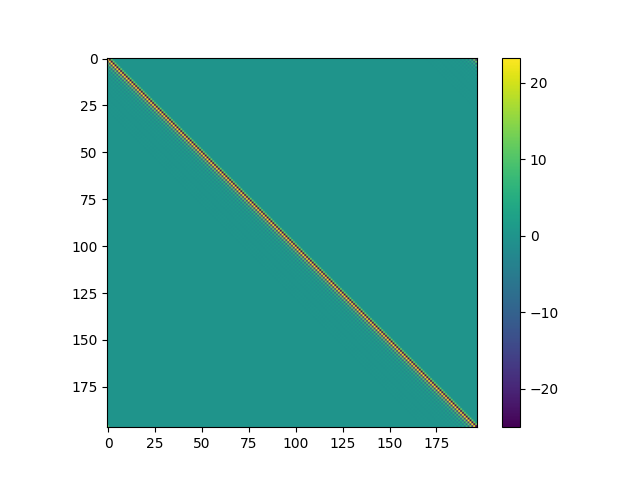

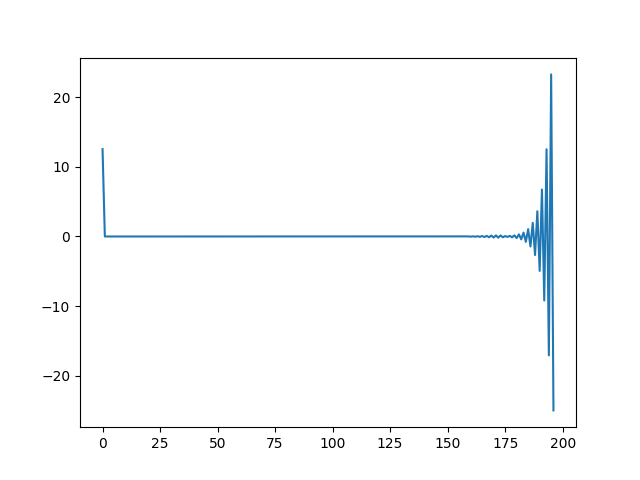

In [553]:
N = tran_fun_dir.size

A = [ [tran_fun_dir[np.mod(j+i, N)] for j in range(N) ] for i in range(1, N)]
A = np.array(A, dtype=np.float64)

idxs = np.arange(N)

b = np.empty_like(tran_fun_dir)

for k in idxs:

    b[k] = (-1)**k * np.linalg.det(A[:,idxs != k])

b /= np.dot(b,tran_fun_dir)

B = [ [b[np.mod(-j+i-1, N)] for j in range(N) ] for i in range(0, N)]
B = np.array(B, dtype=np.float64)

# A = [ [tran_fun_dir[np.mod(j-i-1, N)] for j in range(N) ] for i in range(0, N)]
# A = np.array(A, dtype=np.float64)

# B = np.linalg.inv(A)


plt.figure()
plt.imshow(B)
plt.colorbar()

# removing values at first indexies, which is equivalent of removing artificially added matrix corner elements
tran_fun_other_dir = B[-1,:]

# It will not work if you remove corvner matrix elements :( #tran_fun_other_dir[:20] = 0


plt.figure()
plt.plot(tran_fun_other_dir)

In [554]:
def conv_trans_func_sig(function, signal):

    result = np.empty_like(signal)

    N = result.size

    idxs = np.arange(N)

    for i in range(N):

        result[i] = np.dot(function[np.mod(idxs-1-i,N)], signal)

    return result

In [555]:
print(np.mean(np.abs(B[-1,:]-tran_fun_other_dir)))

0.0


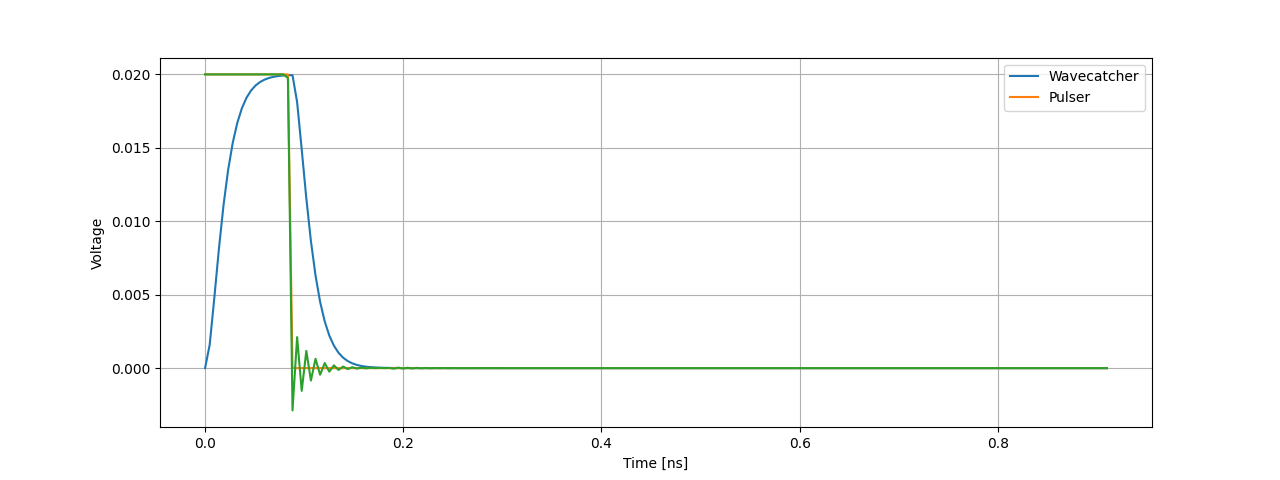

In [ ]:
I_2_restor = conv_trans_func_sig(tran_fun_other_dir, I_2)

plt.figure(figsize=(6.4*2, 4.8))
plt.plot(t*1e9, np.real(I_2),      label = "Wavecatcher")
plt.plot(t*1e9, np.real(I_2_true), label = "Pulser"     )
plt.plot(t*1e9, I_2_restor)


plt.grid()
plt.xlabel("Time [ns]")
plt.ylabel("Voltage")
plt.legend()

### It happens that approach will not works if one remove corner elements

Thi can be understood in one looks at the lincident line just above diagonal in imshow representation of reverse transition function, there are elements which is not zero. If one remove corner elements, that would meed he remove thouse non zero elements on incident line as well and thouse elements happens to be play significant role in analysis.

This is embarassion, because is one has elements abouve diagonal that mean one use readings of the signal at the moment which is not happened yet in time. This occures because we uses fourrier strategy here, which is periodic, and it happend that we use moment of fitire time due to periodicity (which identical to one in the past)

# Reconstruction exponent with direct approach transtition function

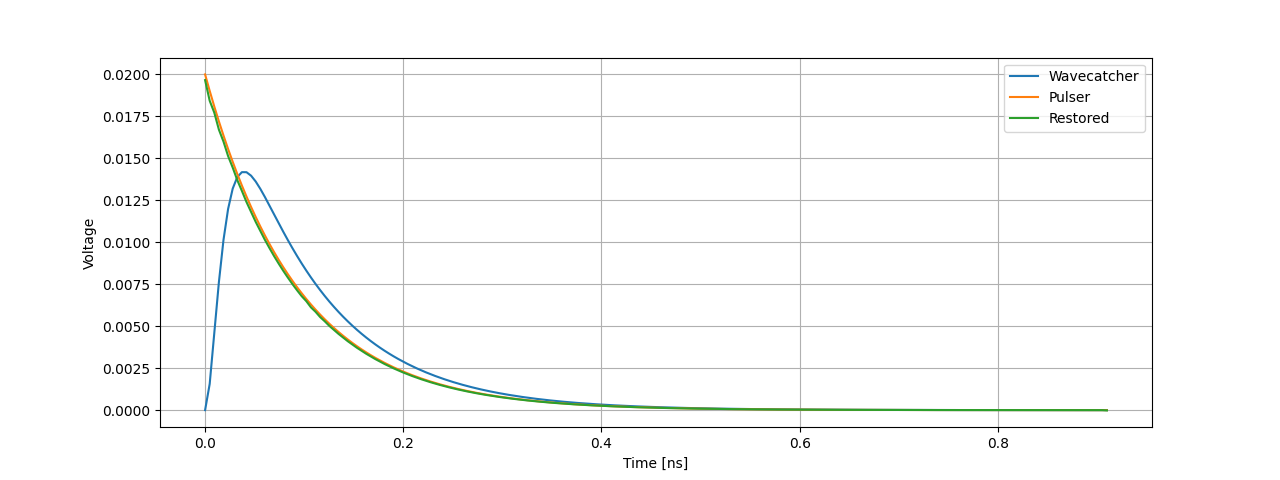

In [558]:
I_exp_restor_dir = conv_trans_func_sig(tran_fun_other_dir, I_exp)

plt.figure(figsize=(6.4*2, 4.8))
plt.plot(t*1e9, np.real(I_exp),      label = "Wavecatcher")
plt.plot(t*1e9, np.real(I_exp_true), label = "Pulser"     )
plt.plot(t*1e9, I_exp_restor_dir,    label = "Restored")


plt.grid()
plt.xlabel("Time [ns]")
plt.ylabel("Voltage")
plt.legend()